# Exercise-1: Training Deep Neural Network on MNIST

Train a controlled deep neural network on the MNIST dataset. Set random seeds to 42.
Load and preprocess MNIST. Build the network using the following configuration:
- Flatten input images to 28 × 28 = 784 features
- 3 hidden layers, 64 neurons each
- ELU activation function
- He normal initialization
- Output layer: 10 neurons with softmax
- Optimizer: Nadam
- learning_rate = 0.001, loss=sparse_categorical_crossentropy
- EarlyStopping callback: monitor validation loss, patience = 5, restore best weights
- epochs = 50, batch size = 32
- Use only the first 1000 training samples and first 200 test samples

## Q1.1 Report the obtained test accuracy.

In [2]:
# Load MNIST dataset
from tensorflow.keras.datasets import mnist

RANDOM_SEED = 42
hidden_layers = 3
hidden_neurons = 64
output_neurons = 10
learning_rate = 0.001

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data, normalize and reshape
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# Use only the first 1000 training samples and first 200 test samples
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:200]
y_test = y_test[:200]

import tensorflow as tf
tf.random.set_seed(RANDOM_SEED)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential()
# Input layer
model.add(Dense(hidden_neurons, activation='elu', kernel_initializer='he_normal', input_shape=(28 * 28,)))
# Hidden layers, 3 layers with ELU activation and He normal initialization
for _ in range(hidden_layers - 1):
    model.add(Dense(hidden_neurons, activation='elu', kernel_initializer='he_normal'))
# Output layer with softmax activation
model.add(Dense(output_neurons, activation='softmax'))
model.compile(optimizer=Nadam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Early stopping callback
earl = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(x_train, 
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[earl],
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/50


/opt/miniconda3/envs/envAssignments/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5337 - loss: 1.5253 - val_accuracy: 0.7400 - val_loss: 0.9290
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - loss: 0.6158 - val_accuracy: 0.8250 - val_loss: 0.6030
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.3629 - val_accuracy: 0.8450 - val_loss: 0.5294
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9438 - loss: 0.2524 - val_accuracy: 0.8750 - val_loss: 0.5188
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9613 - loss: 0.1839 - val_accuracy: 0.8600 - val_loss: 0.5287
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.1356 - val_accuracy: 0.8400 - val_loss: 0.5464
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9862 - loss: 0.1013 - val_accuracy: 0.8400 - val_loss: 0.5706
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9912 - loss: 0.0757 - val_accuracy: 0.8400 - val_loss: 0.6049
Epo

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


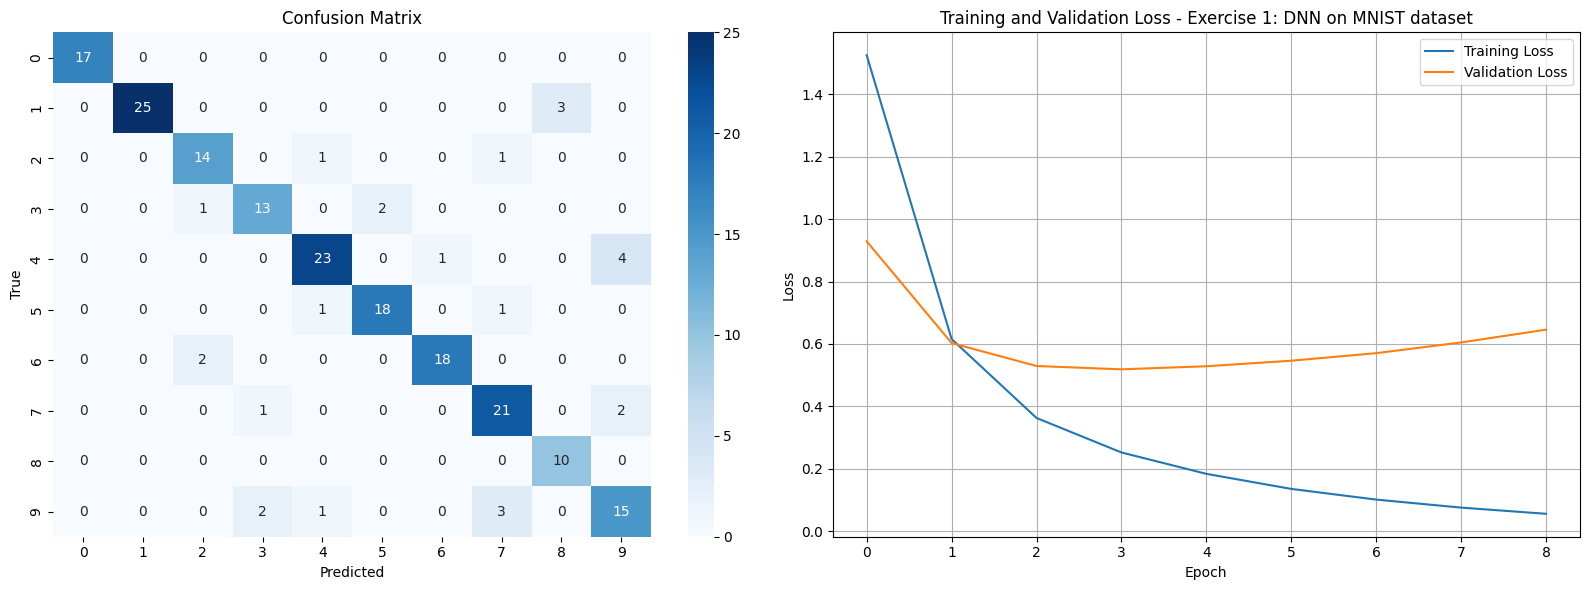

In [3]:
from helper import plot_model_evaluation

# Plot model evaluation
plot_model_evaluation(model, x_test, y_test, history, exercise_title='Exercise 1: DNN on MNIST dataset')